In [1]:
import os, shutil
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

In [3]:
base_dir = r"C:\Users\Lakshmi Priya\Desktop\Transfer_Learning\Data"

In [4]:
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
validation_dir = os.path.join(base_dir,'validation')

In [5]:
train_plain_dir = os.path.join(train_dir,'plain')
train_pothole_dir = os.path.join(train_dir,'pothole')

In [6]:
test_plain_dir = os.path.join(test_dir,'plain')
test_pothole_dir = os.path.join(test_dir,'pothole')

In [7]:
validation_plain_dir = os.path.join(validation_dir,'plain')
validation_pothole_dir = os.path.join(validation_dir,'pothole')

In [8]:
# Sanity checks
print('total training plain images :', len(os.listdir(train_plain_dir)))
print('total training pothole images : ',len(os.listdir(train_pothole_dir)))
print('total validation plain images :', len(os.listdir(validation_plain_dir)))
print('total validation pothole images :', len(os.listdir(validation_pothole_dir)))
print('total test plain images :', len(os.listdir(test_plain_dir)))
print('total test pothole images :', len(os.listdir(test_pothole_dir)))

total training plain images : 210
total training pothole images :  211
total validation plain images : 70
total validation pothole images : 70
total test plain images : 70
total test pothole images : 70


In [9]:
train_size, validation_size, test_size = 420,140,140
img_width, img_height = 224, 224

89.StradaDellaForra-min.jpg


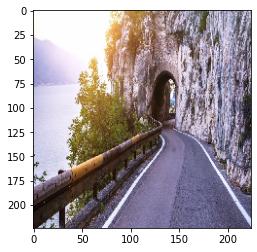

27.potholes-galore.JPG


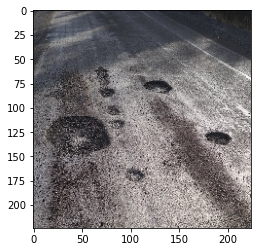

14.roadsfuture18.jpg


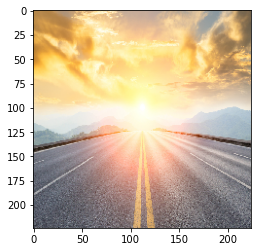

30.image_uploaded_from_ios_0.jpg


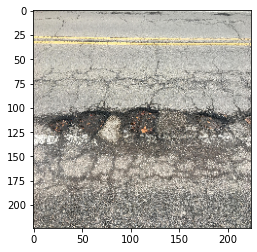

In [10]:
def show_pictures(path):
    random_img = random.choice(os.listdir(path))
    img_path = os.path.join(path, random_img)
    print(random_img)
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
    img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application
    plt.imshow(img_tensor)
    plt.show()
    
for i in range(0,2):
    show_pictures(train_plain_dir)
    show_pictures(train_pothole_dir)

In [11]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(img_width, img_height, 3))

W0412 22:35:54.713315 21580 module_wrapper.py:139] From C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:63: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0412 22:35:54.719331 21580 module_wrapper.py:139] From C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:492: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0412 22:35:54.724287 21580 module_wrapper.py:139] From C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:3630: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0412 22:35:54.763265 21580 module_wrapper.py:139] From C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:3458: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d inste

In [12]:
# Check architecture
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [13]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))  # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='binary')
    # Pass data through convolutional base
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
    
train_features, train_labels = extract_features(train_dir, train_size)  # Agree with our small dataset size
validation_features, validation_labels = extract_features(validation_dir, validation_size)
test_features, test_labels = extract_features(test_dir, test_size)

Found 420 images belonging to 2 classes.


C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Found 140 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [14]:
# Debug
print(train_features)
print(train_labels)

[[[[0.         0.         0.12714267 ... 0.         0.71041751
    0.        ]
   [0.         0.         0.22859463 ... 0.         0.94457436
    0.        ]
   [0.         0.         0.         ... 0.         1.05641508
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.62469554
    0.        ]
   [0.         0.         0.         ... 0.         0.66292137
    0.        ]
   [0.02405612 0.         0.         ... 0.         0.7396155
    0.        ]]

  [[0.20322037 0.         1.0588727  ... 0.         0.936019
    0.        ]
   [0.14737877 0.         1.11405981 ... 0.         1.01494288
    0.        ]
   [0.         0.         0.64248502 ... 0.         1.37405038
    0.        ]
   ...
   [0.26892358 0.         0.         ... 0.         0.98346984
    0.        ]
   [0.05834892 0.         0.         ... 0.         0.89326429
    0.        ]
   [0.         0.         0.         ... 0.         0.35230958
    0.        ]]

  [[0.94233739 0.         0.82234442 

In [15]:
train_features.shape

(420, 7, 7, 512)

# Modeling

In [16]:
# Define model
from keras import models
from keras import layers
from keras import optimizers

epochs = 100

model = models.Sequential()
model.add(layers.Flatten(input_shape=(7,7,512)))
model.add(layers.Dense(256, activation='relu', input_dim=(7*7*512)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

W0412 22:38:35.758370 21580 deprecation.py:506] From C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:1259: calling reduce_prod_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
W0412 22:38:35.789992 21580 deprecation.py:506] From C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:3013: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 6,423,041
Trainable params: 6,423,041
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile model
model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

W0412 22:38:35.865342 21580 module_wrapper.py:139] From C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\keras\optimizers.py:711: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0412 22:38:35.873304 21580 module_wrapper.py:139] From C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:2944: The name tf.log is deprecated. Please use tf.math.log instead.

W0412 22:38:35.880264 21580 deprecation.py:323] From C:\Users\Lakshmi Priya\anaconda3\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [18]:
# Train model
history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    validation_data=(validation_features, validation_labels))

W0412 22:38:36.277301 21580 module_wrapper.py:139] From C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:953: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0412 22:38:36.319189 21580 deprecation.py:506] From C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:675: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0412 22:38:36.450549 21580 module_wrapper.py:139] From C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:940: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 420 samples, validate on 140 samples
Epoch 1/100
420/420 [==============================] - 3s 7ms/step - loss: 1.4689 - acc: 0.7238 - val_loss: 0.2458 - val_acc: 0.9286
Epoch 2/100
420/420 [==============================] - 2s 5ms/step - loss: 0.1989 - acc: 0.9429 - val_loss: 0.2220 - val_acc: 0.9071
Epoch 3/100
420/420 [==============================] - 2s 5ms/step - loss: 0.1664 - acc: 0.9619 - val_loss: 0.1648 - val_acc: 0.9357
Epoch 4/100
420/420 [==============================] - 2s 5ms/step - loss: 0.0762 - acc: 0.9643 - val_loss: 0.0991 - val_acc: 0.9571
Epoch 5/100
420/420 [==============================] - 2s 5ms/step - loss: 0.0456 - acc: 0.9810 - val_loss: 0.1211 - val_acc: 0.9500
Epoch 6/100
420/420 [==============================] - 2s 5ms/step - loss: 0.0359 - acc: 0.9857 - val_loss: 0.1044 - val_acc: 0.9714
Epoch 7/100
420/420 [==============================] - 2s 5ms/step - loss: 0.0211 - acc: 0.9929 - val_loss: 0.1013 - val_acc: 0.9786
Epoch 8/100
420/420 [==

420/420 [==============================] - 2s 6ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.1282 - val_acc: 0.9643
Epoch 62/100
420/420 [==============================] - 2s 6ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.1351 - val_acc: 0.9714
Epoch 63/100
420/420 [==============================] - 2s 6ms/step - loss: 8.8588e-04 - acc: 1.0000 - val_loss: 0.1642 - val_acc: 0.9786
Epoch 64/100
420/420 [==============================] - 2s 5ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.1448 - val_acc: 0.9786
Epoch 65/100
420/420 [==============================] - 2s 5ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.1367 - val_acc: 0.9786
Epoch 66/100
420/420 [==============================] - 2s 5ms/step - loss: 7.3561e-04 - acc: 1.0000 - val_loss: 0.1544 - val_acc: 0.9786
Epoch 67/100
420/420 [==============================] - 2s 5ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.1882 - val_acc: 0.9643
Epoch 68/100
420/420 [==============================] - 2s 5ms/step

In [19]:
# Save model
model.save('pothole_fcl.h5')

# Model evaluation

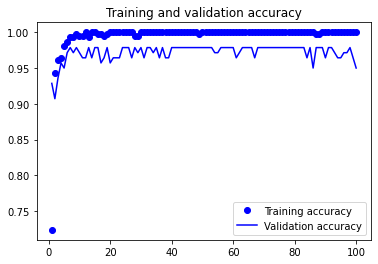

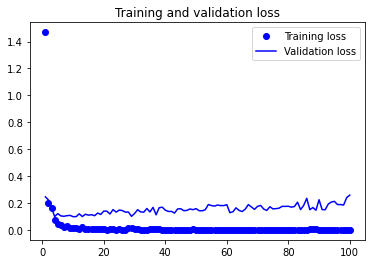

In [20]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Model in action

In [21]:
# Define function to visualize predictions
def visualize_predictions(classifier, n_cases):
    for i in range(0,n_cases):
        path = random.choice([test_plain_dir, test_pothole_dir])

        # Get picture
        random_img = random.choice(os.listdir(path))
        img_path = os.path.join(path, random_img)
        img = image.load_img(img_path, target_size=(img_width, img_height))
        img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
        img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application

        # Extract features
        features = conv_base.predict(img_tensor.reshape(1,img_width, img_height, 3))

        # Make prediction
        try:
            prediction = classifier.predict(features)
        except:
            prediction = classifier.predict(features.reshape(1, 7*7*512))

        # Show picture
        plt.imshow(img_tensor)
        plt.show()

        # Write prediction
        if prediction < 0.5:
            print('Plain')
        else:
            print('Pothole')

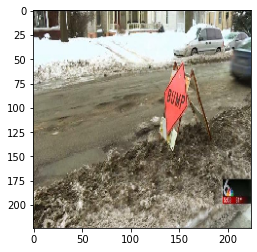

Pothole


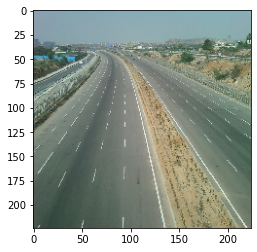

Plain


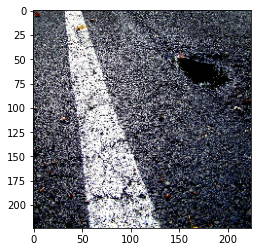

Pothole


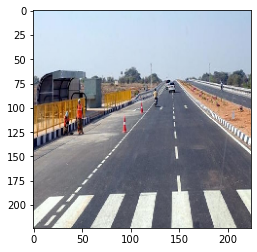

Plain


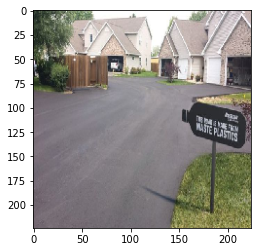

Plain


In [22]:
# Visualize predictions
visualize_predictions(model, 5)

## Performance metrics

In [23]:
# Define function to visualize predictions
def test_output(classifier):
    result = []
    for f in test_features:
      try:
          prediction = classifier.predict(f)
      except:
          prediction = classifier.predict(f.reshape(1, 7, 7, 512))
      if(prediction < 0.5):
        result.append(0)
      else:
        result.append(1)
        
    return result
o = test_output(model)


Confusion Matrix: 
[[64  6]
 [ 1 69]]
Accuracy:  0.95
Specificity:  0.9142857142857143
Precision/Positive Predictive Value:  0.92
Negative Predictive Value:  0.9846153846153847
Recall/Sensitivity:  0.9857142857142858
False Positive Rate:  0.8571428571428571
False Negative Rate:  0.014285714285714285
Positive Likelihood Ratio:  1.1500000000000001
Negative Likelihod Ratio:  0.015625
Diagnostic Odds Ratio:  73.60000000000001
False Omission Rate:  0.015384615384615385
F1 Score:  0.9517241379310346
Area under ROC curve:  0.95


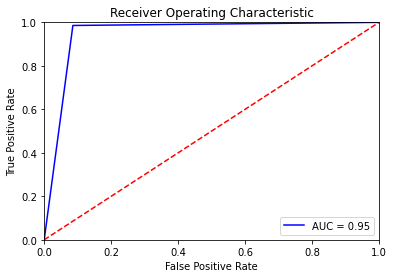

In [24]:
from sklearn.metrics import *
matrix = confusion_matrix(test_labels, o)
print("Confusion Matrix: ")
print(matrix)
[[tn, fp], [fn, tp]] = matrix

acc_score = accuracy_score(test_labels, o)
precision = precision_score(test_labels, o)
recall = tpr = recall_score(test_labels, o)
f1 = f1_score(test_labels, o)
roc_score = roc_auc_score(test_labels, o)
spc = tnr = tn/(tn + fp)
fpr = fp/(fp + fn)
fnr = fn/(fn+tp)
plr = tpr/fpr
nlr = fnr/tnr
dor = plr/nlr
npv = tn/(fn+tn)
fr = fn/(fn+tn)

print("Accuracy: ", acc_score)
print("Specificity: ", spc)
print("Precision/Positive Predictive Value: ", precision)
print("Negative Predictive Value: ", npv)
print("Recall/Sensitivity: ", recall)
print("False Positive Rate: ", fpr)
print("False Negative Rate: ", fnr)
print("Positive Likelihood Ratio: ", plr)
print("Negative Likelihod Ratio: ", nlr)
print("Diagnostic Odds Ratio: ", dor)
print("False Omission Rate: ", fr)
print("F1 Score: ", f1)
print("Area under ROC curve: ", roc_score)


fpr, tpr, threshold = roc_curve(test_labels, o)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# GLOBAL AVG POOLING

In [23]:
# Define model
from keras import models
from keras import layers
from keras import optimizers

epochs = 100

model = models.Sequential()
model.add(layers.GlobalAveragePooling2D(input_shape=(7,7,512)))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile model
model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

In [25]:
# Train model
history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    validation_data=(validation_features, validation_labels))

Train on 420 samples, validate on 140 samples
Epoch 1/100
420/420 [==============================] - 1s 2ms/step - loss: 0.7253 - acc: 0.5024 - val_loss: 0.6828 - val_acc: 0.5857
Epoch 2/100
420/420 [==============================] - 0s 535us/step - loss: 0.6641 - acc: 0.7000 - val_loss: 0.6494 - val_acc: 0.7643
Epoch 3/100
420/420 [==============================] - 0s 514us/step - loss: 0.6292 - acc: 0.8238 - val_loss: 0.6187 - val_acc: 0.8643
Epoch 4/100
420/420 [==============================] - 0s 520us/step - loss: 0.5971 - acc: 0.8667 - val_loss: 0.5907 - val_acc: 0.8857
Epoch 5/100
420/420 [==============================] - 0s 526us/step - loss: 0.5698 - acc: 0.8810 - val_loss: 0.5659 - val_acc: 0.8429
Epoch 6/100
420/420 [==============================] - 0s 567us/step - loss: 0.5400 - acc: 0.9024 - val_loss: 0.5430 - val_acc: 0.8857
Epoch 7/100
420/420 [==============================] - 0s 427us/step - loss: 0.5180 - acc: 0.9071 - val_loss: 0.5219 - val_acc: 0.8929
Epoch 8/100

Epoch 61/100
420/420 [==============================] - 0s 448us/step - loss: 0.1628 - acc: 0.9571 - val_loss: 0.2233 - val_acc: 0.9357
Epoch 62/100
420/420 [==============================] - 0s 473us/step - loss: 0.1610 - acc: 0.9571 - val_loss: 0.2201 - val_acc: 0.9429
Epoch 63/100
420/420 [==============================] - 0s 668us/step - loss: 0.1595 - acc: 0.9571 - val_loss: 0.2190 - val_acc: 0.9429
Epoch 64/100
420/420 [==============================] - 0s 657us/step - loss: 0.1580 - acc: 0.9595 - val_loss: 0.2178 - val_acc: 0.9429
Epoch 65/100
420/420 [==============================] - 0s 491us/step - loss: 0.1556 - acc: 0.9571 - val_loss: 0.2170 - val_acc: 0.9357
Epoch 66/100
420/420 [==============================] - 0s 485us/step - loss: 0.1540 - acc: 0.9571 - val_loss: 0.2160 - val_acc: 0.9357
Epoch 67/100
420/420 [==============================] - 0s 502us/step - loss: 0.1527 - acc: 0.9571 - val_loss: 0.2168 - val_acc: 0.9357
Epoch 68/100
420/420 [==========================

In [26]:
# Save model
model.save('pothole_gap.h5')

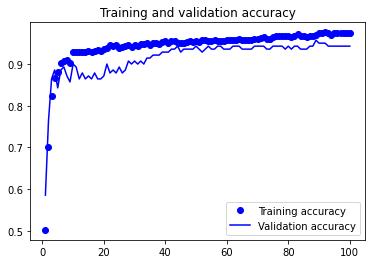

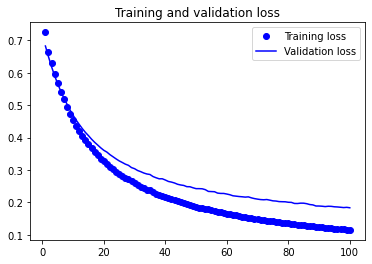

In [27]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

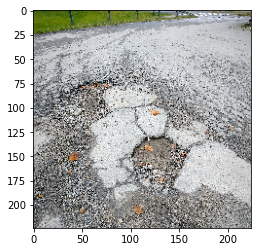

Pothole


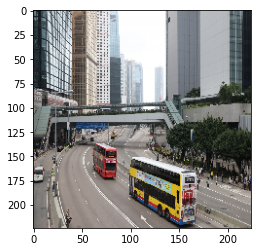

Plain


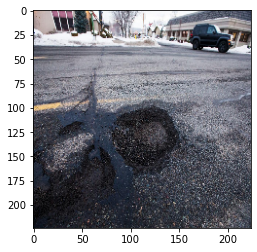

Pothole


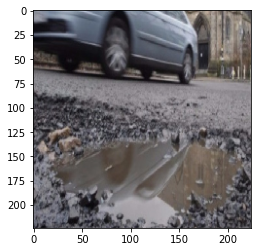

Pothole


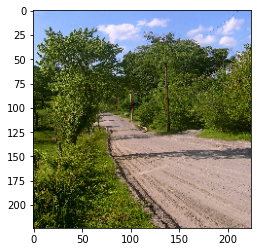

Pothole


In [28]:
# Visualize predictions
visualize_predictions(model, 5)

## Performance metrics

In [44]:
# Define function to visualize predictions
def test_output(classifier):
    result = []
    for f in test_features:
      try:
          prediction = classifier.predict(f)
      except:
          prediction = classifier.predict(f.reshape(1, 7, 7, 512))
      if(prediction < 0.5):
        result.append(0)
      else:
        result.append(1)
        
    return result
o = test_output(model)


Confusion Matrix: 
[[64  6]
 [ 5 65]]
Accuracy:  0.9214285714285714
Specificity:  0.9142857142857143
Precision/Positive Predictive Value:  0.9154929577464789
Negative Predictive Value:  0.927536231884058
Recall/Sensitivity:  0.9285714285714286
False Positive Rate:  0.5454545454545454
False Negative Rate:  0.07142857142857142
Positive Likelihood Ratio:  1.7023809523809526
Negative Likelihod Ratio:  0.078125
Diagnostic Odds Ratio:  21.79047619047619
False Omission Rate:  0.07246376811594203
F1 Score:  0.921985815602837
Area under ROC curve:  0.9214285714285715


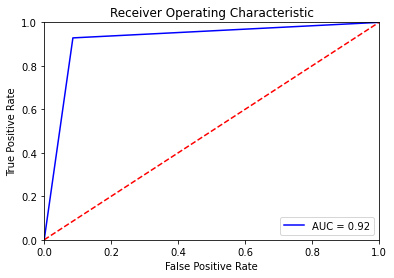

In [45]:
from sklearn.metrics import *
matrix = confusion_matrix(test_labels, o)
print("Confusion Matrix: ")
print(matrix)
[[tn, fp], [fn, tp]] = matrix

acc_score = accuracy_score(test_labels, o)
precision = precision_score(test_labels, o)
recall = tpr = recall_score(test_labels, o)
f1 = f1_score(test_labels, o)
roc_score = roc_auc_score(test_labels, o)
spc = tnr = tn/(tn + fp)
fpr = fp/(fp + fn)
fnr = fn/(fn+tp)
plr = tpr/fpr
nlr = fnr/tnr
dor = plr/nlr
npv = tn/(fn+tn)
fr = fn/(fn+tn)

print("Accuracy: ", acc_score)
print("Specificity: ", spc)
print("Precision/Positive Predictive Value: ", precision)
print("Negative Predictive Value: ", npv)
print("Recall/Sensitivity: ", recall)
print("False Positive Rate: ", fpr)
print("False Negative Rate: ", fnr)
print("Positive Likelihood Ratio: ", plr)
print("Negative Likelihod Ratio: ", nlr)
print("Diagnostic Odds Ratio: ", dor)
print("False Omission Rate: ", fr)
print("F1 Score: ", f1)
print("Area under ROC curve: ", roc_score)


fpr, tpr, threshold = roc_curve(test_labels, o)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Linear support vector machine

In [29]:
# Concatenate training and validation sets
svm_features = np.concatenate((train_features, validation_features))
svm_labels = np.concatenate((train_labels, validation_labels))

In [30]:
svm_labels

array([1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 1.

In [31]:
svm_features.shape

(560, 7, 7, 512)

In [32]:
# Build model
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

X_train, y_train = svm_features.reshape(560,7*7*512), svm_labels

param = [{
          "C": [0.01, 0.1, 1, 10, 100]
         }]
 
svm = LinearSVC(penalty='l2', loss='squared_hinge',max_iter=10000)  # As in Tang (2013)
clf = GridSearchCV(svm, param, cv=10,verbose=10)
clf.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.912, total=   7.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.964, total=   6.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   6.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.946, total=   6.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   26.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.982, total=   6.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   33.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.982, total=   5.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   38.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.982, total=   6.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   44.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.946, total=   6.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   51.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.982, total=   4.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   56.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.982, total=   6.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.912, total=  27.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.964, total=  19.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.982, total=   2.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.946, total=  21.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.982, total=  44.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.982, total=  38.9s
[CV] C=0.1 ...........................................................
[CV] .

C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=0.982, total= 1.1min
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.912, total=   3.5s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.964, total=   3.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.982, total=   2.4s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.946, total=   3.6s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.982, total=   3.2s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.982, total=   3.0s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.8min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=10000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [34]:
# Save model
model.save('pothole_svm.h5')

In [46]:
clf

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=10000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [36]:
# Evaluate model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

print("\nAccuracy score (mean):")
cvss = np.mean(cross_val_score(clf, X_train, y_train, cv=10,verbose=10))
print(cvss)

print("\nAccuracy score (standard deviation):")
asss = np.std(cross_val_score(clf, X_train, y_train, cv=10,verbose=10))
print(asss)


Accuracy score (mean):
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.962, total=   5.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   2.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.940, total=   5.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.8s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   4.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   18.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.940, total=   5.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   5.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   28.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   6.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   35.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   5.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   40.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   6.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   46.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   5.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.962, total=  38.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   2.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.940, total=  26.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=  15.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.940, total=  13.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=  25.3s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.6min finished


[CV] .................................... , score=0.912, total= 7.7min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.904, total=   4.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.961, total=   2.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.941, total=   6.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   8.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   22.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   6.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   5.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   33.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   4.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   38.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   6.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   44.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   7.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   51.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   5.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.904, total=  31.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.961, total=  21.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.941, total=  23.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=  25.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=   8.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=  30.0s
[CV] C=0.1 ...........................................................
[CV] .

C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=0.941, total= 1.2min
[CV] C=1 .............................................................
[CV] ................................. C=1, score=1.000, total=  11.4s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.960, total=  11.9s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.960, total=   2.7s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   3.9s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.960, total=   6.6s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=1.000, total=   2.6s
[CV] C=1 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.9min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] .................................... , score=0.964, total= 9.0min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 16.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.923, total=   2.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.941, total=   5.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.961, total=   5.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   5.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   17.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   4.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   21.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   24.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   6.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   30.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.940, total=   1.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   31.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   6.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   38.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=   2.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.941, total=  23.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.941, total=  27.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   2.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=  10.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=   2.2s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.8min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] .................................... , score=1.000, total= 3.9min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 20.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.904, total=   7.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.941, total=   6.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   5.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.2s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   7.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   26.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.940, total=   6.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   33.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   5.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   38.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   6.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   44.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.940, total=   5.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   49.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   6.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   56.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   5.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=  19.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.941, total=  17.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=   2.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=  14.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.940, total=  20.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=  17.8s
[CV] C=0.1 ...........................................................
[CV] .

C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=0.940, total= 1.2min
[CV] C=1 .............................................................


C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=0.960, total= 1.2min
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=  41.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.940, total=  31.4s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   2.5s
[CV] C=1 .............................................................


C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=0.980, total= 1.0min
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.923, total=   2.4s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.941, total=   2.9s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.980, total=   2.1s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=1.000, total=   3.2s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.940, total=   3.3s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.960, total=   3.0s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 11.5min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] .................................... , score=0.946, total=11.6min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 32.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.923, total=   4.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.941, total=   4.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   4.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   2.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   4.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   20.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   1.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   22.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   4.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   26.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   5.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   31.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   4.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   36.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   5.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=  17.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.941, total=  20.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=  26.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=  15.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=  12.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=  12.0s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.2min finished


[CV] .................................... , score=0.982, total= 6.2min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 38.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.923, total=   2.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.941, total=   2.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.8s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   4.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   3.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   19.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   22.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   1.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   24.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   27.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=  17.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.941, total=   8.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=  12.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=  13.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=  15.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=  16.2s
[CV] C=0.1 ...........................................................
[CV] .

C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=0.941, total=  45.2s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=1.000, total=  26.3s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=  13.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   2.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.960, total=   1.8s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   2.2s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.960, total=  29.6s
[CV] C=1 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.1min finished


[CV] .................................... , score=0.982, total= 5.2min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 43.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.923, total=   3.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.941, total=   3.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   3.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   1.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   2.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   18.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   1.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   19.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   2.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   22.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   1.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   23.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=  18.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.941, total=   1.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=  10.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=   2.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=  12.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=   2.1s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.7min finished


[CV] .................................... , score=0.982, total= 3.8min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 47.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.923, total=   1.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.902, total=   2.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   3.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   1.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   2.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   13.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   15.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   18.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   1.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   20.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   3.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=  13.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.922, total=  11.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=  13.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=   1.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=  17.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=   1.9s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.1min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] .................................... , score=0.946, total= 3.2min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 50.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.923, total=   2.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.941, total=   3.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.8s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   3.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   3.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   1.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   1.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   15.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   16.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   19.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.940, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   20.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=   8.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.941, total=   6.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=  15.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=  16.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=  14.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=   9.4s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.5min finished


[CV] .................................... , score=0.982, total= 3.5min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 54.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.904, total=   2.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.923, total=   2.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   2.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   3.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   2.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   16.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   20.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   22.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.920, total=   2.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   25.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.904, total=  13.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=  11.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=  14.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=  16.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=  15.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=  19.8s
[CV] C=0.1 ...........................................................
[CV] .

C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=1.000, total=  40.2s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.960, total=  12.8s
[CV] C=1 .............................................................


C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=0.980, total=  40.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.960, total=   1.9s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=1.000, total=   1.7s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   1.8s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.920, total=   1.6s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   1.7s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.904, total=   1.7s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.3min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] .................................... , score=0.982, total= 5.6min
0.9679813169286854

Accuracy score (standard deviation):
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 59.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.962, total=   2.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.940, total=   3.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   2.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.940, total=   3.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   3.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   17.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   20.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   2.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   23.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   26.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.962, total=  16.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.940, total=  15.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=  13.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.940, total=  13.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=   4.1s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.6min finished


[CV] .................................... , score=0.912, total= 2.7min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.904, total=   2.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.961, total=   3.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.941, total=   2.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.6s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   2.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   1.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   13.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   15.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   1.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   17.2s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   19.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   2.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.904, total=   7.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.961, total=  12.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.941, total=   9.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=  12.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=   9.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=  13.3s
[CV] C=0.1 ...........................................................
[CV] .

C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=0.960, total=  28.6s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.904, total=   1.2s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.961, total=   1.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.941, total=   1.3s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=1.000, total=   1.2s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.960, total=   1.2s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.960, total=   1.2s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.8min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] .................................... , score=0.964, total= 3.8min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.923, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.941, total=   1.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.961, total=   2.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.8s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   2.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   2.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   10.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   12.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.940, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   13.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   15.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.941, total=  10.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.941, total=  21.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   6.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=   9.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=   2.3s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.1min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] .................................... , score=1.000, total= 3.1min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  9.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.904, total=   3.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.941, total=   3.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   3.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.2s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   3.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   13.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.940, total=   3.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   2.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   20.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   23.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.940, total=   2.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   26.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   29.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=   7.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.941, total=   7.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=  14.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   8.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.940, total=  12.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=   4.6s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.9min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] .................................... , score=0.946, total= 4.9min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 14.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.923, total=   3.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.941, total=   2.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   2.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   3.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   3.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   18.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   20.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   3.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   24.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   1.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   26.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=   9.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.941, total=  19.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   2.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=  16.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=  14.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=   8.6s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.5min finished


[CV] .................................... , score=0.982, total= 3.6min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 18.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.923, total=   2.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.941, total=   2.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.2s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   3.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   3.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   16.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   19.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   2.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   21.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   23.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=   7.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.941, total=  17.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   7.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=   8.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=  17.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=  11.5s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.9min finished


[CV] .................................... , score=0.982, total= 3.9min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 22.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.923, total=   1.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.941, total=   2.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   3.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   1.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   13.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   16.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   2.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   18.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   19.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=  10.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.941, total=   8.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   8.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=   1.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=  11.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=  10.5s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.9min finished


[CV] .................................... , score=0.982, total= 3.0min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 24.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.923, total=   2.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.902, total=   2.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   2.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   2.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   14.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   2.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   17.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   19.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   20.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   2.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=  12.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.922, total=  12.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=  12.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=  12.4s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.6min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] .................................... , score=0.946, total= 2.6min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 27.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.923, total=   3.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.941, total=   2.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   2.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   3.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   16.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   17.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   19.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.940, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   20.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=   1.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.941, total=  14.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   9.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=  16.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=  12.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=  12.9s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.8min finished


[CV] .................................... , score=0.982, total= 2.9min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 30.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.904, total=   3.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.923, total=   3.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   3.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   3.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   1.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   15.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   18.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   22.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.920, total=   2.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   24.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.904, total=   1.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=  13.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=  18.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=  12.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=  11.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=   5.2s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.1min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] .................................... , score=0.982, total= 4.2min
0.024625412620740757


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 34.7min finished


In [38]:
print("Accuracy score (mean) : ", cvss)
print("\nAccuracy score (standard deviation) : ", asss)

Accuracy score (mean) :  0.9679813169286854

Accuracy score (standard deviation) :  0.024625412620740757


[learning_curve] Training set sizes: [ 50 100 150 201 251 301 352 402 452 503]
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.800, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.800, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.800, total=   0.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.800, total=   0.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.800, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.800, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    7.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=1.000, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.800, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.700, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.800, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.700, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   17.6s finished


[CV] ................ , score=(train=1.000, test=0.877), total=  18.0s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.938, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.938, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.875, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.929, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.857, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.938, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.938, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.875, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   23.8s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.912), total=  24.5s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   49.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.905, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.857, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.947, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.895, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.8s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.905, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.857, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   28.4s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.877), total=  29.0s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.923, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.885, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.920, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.2s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    5.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.958, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.885, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.920, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   37.7s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.877), total=  38.5s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.935, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.903, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.900, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.2s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.966, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.935, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.903, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.900, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   42.6s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.877), total=  43.5s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.917, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.944, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.944, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.971, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.914, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.971, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.971, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.971, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.917, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.944, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.944, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.971, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   42.9s finished


[CV] ................ , score=(train=1.000, test=0.877), total=  43.8s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  3.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.927, total=   1.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.925, total=   2.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.8s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.950, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    8.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    9.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   10.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.949, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.927, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.925, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.950, total=   1.5s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


[CV] ................ , score=(train=1.000, test=0.895), total= 1.2min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  4.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.935, total=   3.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   4.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.978, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.957, total=   3.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.957, total=   2.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.956, total=   2.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   16.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.978, total=   1.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   18.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.977, total=   2.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   20.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.955, total=   2.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   23.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.977, total=   2.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.935, total=   2.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=  10.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=   2.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.957, total=   8.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.957, total=   6.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.956, total=  16.9s
[CV] C=0.1 ...........................................................
[CV] .

C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=0.935, total=  35.8s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=1.000, total=   1.6s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.978, total=   1.4s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.957, total=   1.7s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.957, total=  30.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.956, total=   1.4s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.978, total=   1.6s
[CV] C=1 .............................................................
[CV] .

C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=0.955, total=  36.7s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.977, total=   1.6s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.935, total=   1.5s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=1.000, total=   1.4s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.978, total=   1.4s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.957, total=   1.8s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.957, total=   1.6s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.2min finished


[CV] ................ , score=(train=1.000, test=0.895), total= 5.2min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  9.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.962, total=   3.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.940, total=   3.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   3.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.940, total=   2.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   2.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   17.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   19.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   3.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   22.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   25.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.962, total=  15.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.940, total=  12.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=  15.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.940, total=  10.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=  16.4s
[CV] C=0.1 ...........................................................
[CV] .

C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=1.000, total=  42.2s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.940, total=  15.2s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.960, total=   1.6s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   1.7s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.940, total=   1.5s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   1.7s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   1.7s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.2min finished


[CV] ................ , score=(train=1.000, test=0.912), total= 4.3min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.833, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.833, total=   0.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.833, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.750, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.750, total=   0.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.2s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    8.2s finished


[CV] ................ , score=(train=1.000, test=0.893), total=   8.5s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=1.000, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.900, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.900, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.900, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.800, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.900, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.900, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.6s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.900, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.900, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.900, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.800, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.900, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   21.2s finished


[CV] ................ , score=(train=1.000, test=0.946), total=  21.7s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.938, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.875, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.875, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.867, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.2s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.786, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.938, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.875, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.875, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.867, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.933, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   30.3s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.929), total=  31.0s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.905, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.857, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.947, total=   1.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.895, total=   0.7s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.6s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.905, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.857, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   40.6s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.929), total=  41.5s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.962, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.885, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.920, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.958, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.962, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.885, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.920, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   44.7s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.946), total=  45.6s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.935, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.871, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.967, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.966, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.935, total=   1.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.871, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.933, total=   1.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.6min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.946), total= 7.6min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.972, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.972, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.971, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.943, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.971, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.971, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.972, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.861, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.944, total=   1.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.971, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   42.9s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.929), total=  43.9s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.902, total=   2.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.951, total=   2.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   2.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.950, total=   2.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   2.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   13.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   14.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   15.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   16.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.900, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.902, total=   4.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.927, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=  13.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.950, total=   6.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=  18.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.975, total=  18.2s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.2min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.946), total= 3.3min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.913, total=   4.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.935, total=   4.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.8s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   4.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.957, total=   3.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   16.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.978, total=   3.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   20.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.957, total=   5.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   25.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.977, total=   6.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   32.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.977, total=   6.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   38.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.909, total=   5.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   43.6s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   5.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.913, total=  29.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.935, total=  26.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=  10.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.957, total=   2.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=  12.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=  22.4s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.2min finished


[CV] ................ , score=(train=1.000, test=0.964), total= 7.3min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.904, total=   5.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.961, total=   6.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.960, total=   3.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   4.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   3.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   26.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   29.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.940, total=   4.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   33.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   3.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   37.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.904, total=  10.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.961, total=  14.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=  18.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=  20.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=   6.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=   8.2s
[CV] C=0.1 ...........................................................
[CV] .

C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=0.960, total=  50.8s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=  36.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=  20.5s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.940, total=   3.3s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=1.000, total=  28.8s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=  43.8s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.904, total=   2.9s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.4min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.964), total= 7.5min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.833, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.833, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.833, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.750, total=   0.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.750, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.8s remaining:    0.0s


[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    9.9s finished


[CV] ................ , score=(train=1.000, test=0.964), total=  10.2s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.909, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.909, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.818, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.909, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.818, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   1.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.909, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.909, total=   4.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.818, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.909, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.818, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.889, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   35.6s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total=  36.3s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.938, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.875, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.875, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.867, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.6s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.786, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.938, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.875, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.875, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.867, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   34.2s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=1.000), total=  34.9s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.952, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.952, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.857, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.952, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.905, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.6s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.895, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.952, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.952, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.857, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.952, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.905, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   46.7s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=1.000), total=  47.6s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.885, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.923, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.920, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.920, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.6s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    9.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   10.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.958, total=   1.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.885, total=   1.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=   1.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.920, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.920, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   54.5s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=1.000), total=  55.5s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.903, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.903, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.967, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.967, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.967, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.966, total=   1.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.903, total=   1.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.903, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.967, total=   1.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.933, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.933, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.8s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=1.000), total= 1.1min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.917, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.972, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.971, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.943, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.971, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    9.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.917, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.889, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.917, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.972, total=   1.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.971, total=   1.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=1.000), total= 1.1min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.902, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.927, total=   3.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.950, total=   2.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.950, total=   2.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   2.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   2.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   16.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   17.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   18.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   20.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.925, total=   2.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.902, total=   1.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.927, total=  12.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.950, total=  12.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.950, total=  22.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.975, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.4min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=1.000), total= 2.5min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.913, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.935, total=   2.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.978, total=   2.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.957, total=   3.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.978, total=   1.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.978, total=   2.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   13.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   15.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.977, total=   2.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.977, total=   2.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   18.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.932, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   19.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   4.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.913, total=   2.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.913, total=   3.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=   7.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.957, total=  15.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=   1.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=   1.6s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.9min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total= 2.0min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.923, total=   1.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.941, total=   4.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   3.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   1.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   14.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   4.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   18.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.940, total=   1.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   20.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   4.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   25.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=   2.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.941, total=   9.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=   4.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   2.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=   2.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=   1.4s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.9min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total= 3.0min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.833, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.833, total=   0.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.833, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.01 ..........................................................

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s remaining:    0.0s



[CV] .............................. C=0.01, score=1.000, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.750, total=   0.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.750, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   11.1s finished


[CV] ................ , score=(train=1.000, test=0.946), total=  11.5s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.909, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.909, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.818, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.909, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.818, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.909, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.909, total=   3.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.818, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.909, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.818, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.889, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   31.0s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.946), total=  31.8s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.938, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.938, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.875, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.875, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.929, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.929, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.938, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.938, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.875, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.875, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.933, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.933, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   40.3s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.946), total=  41.3s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=1.000, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.905, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.857, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.952, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.905, total=   1.1s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.905, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.857, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.952, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.905, total=   1.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   49.0s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ............................... C=100, score=1.000, total=   0.7s
[CV] ................ , score=(train=1.000, test=0.964), total=  49.9s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.962, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.885, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.920, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.920, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.958, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.962, total=   1.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.885, total=   1.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.920, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.920, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   60.0s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.946), total= 1.0min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.935, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.871, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.967, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.6s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    8.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   1.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   10.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.967, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   11.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.966, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.935, total=   1.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.871, total=   1.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.967, total=   1.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.933, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.964), total= 1.1min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.944, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.2s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.914, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.2s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.971, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    9.2s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.944, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.889, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.889, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.5s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.946), total= 1.1min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.927, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.927, total=   1.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.925, total=   1.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   2.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   4.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.950, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   12.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   2.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   14.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.950, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   15.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   17.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.925, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.927, total=   5.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.927, total=   9.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.925, total=   9.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   8.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.950, total=  12.4s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.0min finished


[CV] ................ , score=(train=1.000, test=0.964), total= 3.1min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.913, total=   2.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.935, total=   2.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.957, total=   2.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.6s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   2.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.957, total=   3.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.978, total=   3.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   17.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.955, total=   3.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   21.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.977, total=   1.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   22.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.932, total=   4.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   27.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.977, total=   2.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.913, total=  13.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.935, total=   1.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.957, total=  12.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=  14.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.957, total=  14.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=  15.3s
[CV] C=0.1 ...........................................................
[CV] .

C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=0.957, total=  28.3s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.978, total=  13.4s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.955, total=   1.4s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.977, total=   1.3s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.932, total=   1.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.977, total=   8.1s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.913, total=   1.3s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.3min finished


[CV] ................ , score=(train=1.000, test=0.946), total= 4.3min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.923, total=   2.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.941, total=   1.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   2.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.940, total=   3.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   1.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   14.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   17.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   2.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   19.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   22.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=   9.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.941, total=   4.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=  13.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=  12.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.940, total=  16.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=   2.2s
[CV] C=0.1 ...........................................................
[CV] .

C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=0.923, total=  30.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.941, total=   1.5s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   1.2s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=1.000, total=   1.6s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.940, total=   1.4s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.960, total=   1.5s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=  26.9s
[CV] C=1 .............................................................


C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=0.940, total=  36.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   1.5s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   1.5s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.923, total=   1.4s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.941, total=   2.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.980, total=   1.5s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=1.000, total=   2.0s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.3min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.964), total= 4.4min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.833, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.833, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.833, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.750, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.750, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.5s remaining:    0.0s


[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   10.2s finished


Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.909, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.909, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.818, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.909, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.818, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.909, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.909, total=   2.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.818, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.909, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.818, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.889, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   23.0s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total=  23.4s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.938, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.938, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.875, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.875, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.929, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.929, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.938, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.938, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.875, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.875, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.933, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.933, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   24.3s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total=  24.9s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=1.000, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.857, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.905, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.900, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.900, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.8s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.8s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    5.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.895, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.857, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.905, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.900, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.900, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   33.6s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total=  34.4s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.962, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.885, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.920, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.920, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.2s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.920, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.920, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.958, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.962, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.920, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.920, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   45.1s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total=  46.0s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.935, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.903, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.967, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.900, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.6s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.967, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.966, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.935, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.903, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.967, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.933, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   46.4s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total=  47.4s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.972, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.914, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.971, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.971, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.972, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.889, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.889, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.914, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   49.0s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total=  50.1s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.902, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.927, total=   2.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.950, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.950, total=   2.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   2.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   10.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   12.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   13.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.950, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.902, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.927, total=   5.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.950, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.950, total=  11.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.975, total=   2.9s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total= 1.5min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.935, total=   1.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.913, total=   2.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.978, total=   2.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.935, total=   2.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.978, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   10.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.977, total=   1.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   12.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.977, total=   2.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   15.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.955, total=   2.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   17.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.977, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.935, total=   8.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.913, total=  12.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=  11.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.935, total=  13.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=   5.2s
[CV] C=0.1 ...........................................................
[CV] .

C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=0.977, total=  30.2s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.955, total=   1.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.977, total=   1.2s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.935, total=   1.4s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.913, total=   1.3s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.978, total=   1.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=1.000, total=   1.3s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.3min finished


[CV] ................ , score=(train=1.000, test=0.982), total= 3.3min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.923, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.941, total=   2.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   4.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   3.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   3.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   17.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   21.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   1.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   22.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   25.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=  13.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.941, total=  12.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=   4.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=  16.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=  12.3s
[CV] C=0.1 ...........................................................
[CV] .

C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=1.000, total=  36.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.960, total=   1.7s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.960, total=   1.6s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   2.2s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   5.7s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.960, total=  22.4s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   1.4s
[CV] C=1 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.6min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total= 4.7min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.833, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.833, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.833, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.750, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.750, total=   0.2s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.4s remaining:    0.0s


[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   10.0s finished


[CV] ................ , score=(train=1.000, test=0.929), total=  10.4s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.909, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.909, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.818, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.909, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.818, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    5.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.909, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.909, total=   3.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.818, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.909, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.818, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.889, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   26.6s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.964), total=  27.1s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.938, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.938, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.875, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.875, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.929, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.6s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.929, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.938, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.938, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.875, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.875, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.933, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.933, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   31.8s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total=  32.4s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.857, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.905, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.900, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.900, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.2s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    5.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.895, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.857, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.905, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.900, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.900, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   31.4s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.964), total=  32.1s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.962, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.920, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.880, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.880, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.8s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.920, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.962, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.920, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.880, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.880, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   45.6s finished


[CV] ................ , score=(train=1.000, test=0.964), total=  46.5s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.935, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.871, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.967, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.967, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.6s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.931, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.935, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.871, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.967, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.933, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.967, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.967, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   40.8s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total=  41.7s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.944, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.943, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.971, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.971, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.944, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.889, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.889, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.943, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   49.9s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total=  51.1s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.902, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.927, total=   2.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.950, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   2.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   2.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   10.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   13.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   14.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.950, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.902, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.927, total=   4.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.950, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.975, total=   8.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.975, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total= 1.4min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.913, total=   2.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.913, total=   3.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.978, total=   2.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.957, total=   2.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.978, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   12.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.977, total=   2.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   15.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.977, total=   2.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   17.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.955, total=   2.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   19.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.977, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.913, total=   8.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.913, total=   1.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.957, total=   8.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=   2.9s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.3min finished


[CV] ................ , score=(train=1.000, test=0.982), total= 2.4min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.923, total=   2.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.941, total=   3.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   1.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   1.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   12.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   15.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   2.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   17.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   19.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=  11.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.941, total=  12.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=  12.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=   8.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=  12.4s
[CV] C=0.1 ...........................................................
[CV] .

C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=0.941, total=  31.9s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=1.000, total=   1.7s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   1.8s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   1.5s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.960, total=  38.2s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   2.3s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.960, total=   2.1s
[CV] C=1 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.8min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total= 3.9min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.833, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.833, total=   0.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.833, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.750, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.750, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   15.5s finished


[CV] ................ , score=(train=1.000, test=0.929), total=  16.0s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.909, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.909, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.818, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.909, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.818, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    5.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.909, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.909, total=   3.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.818, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.909, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.818, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.889, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   30.0s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total=  30.7s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.938, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.938, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.875, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.875, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.929, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.929, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.938, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.938, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.875, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.875, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.933, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.933, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   34.6s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.964), total=  35.4s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.857, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.905, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.900, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.900, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.6s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.895, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.857, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.905, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.900, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.900, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   46.7s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total=  47.5s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.962, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.920, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.880, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.880, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.920, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.962, total=   1.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.920, total=   1.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.880, total=   1.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.880, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


[CV] ................ , score=(train=1.000, test=0.982), total= 1.1min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.968, total=   1.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.871, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.968, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.935, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.967, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.897, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    9.8s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   11.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   13.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.931, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.968, total=   1.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.903, total=   1.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.968, total=   2.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.935, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.967, total=   1.3s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


[CV] ................ , score=(train=1.000, test=0.982), total= 1.1min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.972, total=   1.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.917, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   1.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.943, total=   1.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   10.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.971, total=   1.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   12.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.971, total=   1.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   13.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.971, total=   1.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.972, total=   1.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.917, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.889, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.943, total=   1.5s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total= 1.2min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.927, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.927, total=   1.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.950, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   2.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   2.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   13.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   14.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.950, total=   1.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.927, total=   3.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.927, total=   2.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.925, total=   1.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.950, total=   1.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.975, total=   2.1s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


[CV] ................ , score=(train=1.000, test=0.982), total= 1.6min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.935, total=   2.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.913, total=   2.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.978, total=   2.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.957, total=   2.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.978, total=   2.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   14.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.977, total=   1.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   16.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.977, total=   3.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   20.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.955, total=   2.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   22.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.977, total=   1.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.935, total=  12.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.913, total=  10.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=  14.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.957, total=   9.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=   6.7s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.9min finished


[CV] ................ , score=(train=1.000, test=0.982), total= 3.0min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.923, total=   3.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.941, total=   3.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   2.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   17.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   3.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   20.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   2.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   22.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   23.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=   3.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.941, total=  12.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=   1.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=  12.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=   7.8s
[CV] C=0.1 ...........................................................
[CV] .

C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=0.941, total=  33.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=1.000, total=  26.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   1.5s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=  23.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   1.6s
[CV] C=1 .............................................................


C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=0.960, total=  36.8s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.960, total=   1.4s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   1.5s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   1.5s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.923, total=   1.9s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.941, total=   1.7s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=1.000, total=   1.5s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.4min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total= 4.4min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.833, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.833, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.833, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.2s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s


[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.2s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.1s remaining:    0.0s


[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.750, total=   0.2s
[CV] C=0.01 ..........................................................

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.5s remaining:    0.0s



[CV] .............................. C=0.01, score=0.750, total=   0.2s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.7s remaining:    0.0s


[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   10.2s finished


[CV] ................ , score=(train=1.000, test=0.911), total=  10.5s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.909, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.909, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.818, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.909, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.818, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.909, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.909, total=   2.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.818, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.909, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.818, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.889, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   20.3s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.946), total=  20.8s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.938, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.938, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.875, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.875, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.929, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.929, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.938, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.938, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.875, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.875, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.933, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.933, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   24.6s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.946), total=  25.2s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.857, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.905, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.900, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.900, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.6s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    5.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.895, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.857, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.905, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.900, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.900, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   35.1s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.946), total=  35.9s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.962, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.920, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.880, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.880, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.920, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.962, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.920, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.880, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.880, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   37.9s finished


[CV] ................ , score=(train=1.000, test=0.946), total=  38.8s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.968, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.871, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.968, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.935, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.967, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.897, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.8s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.931, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.968, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.903, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.968, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.935, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.967, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   45.1s finished


[CV] ................ , score=(train=1.000, test=0.946), total=  46.2s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.972, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.917, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.914, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.914, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.971, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.971, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.943, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.972, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.917, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.914, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.914, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   49.6s finished


[CV] ................ , score=(train=1.000, test=0.946), total=  50.7s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.902, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.927, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.950, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.950, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.927, total=   1.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.927, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.950, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.950, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.975, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   54.0s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.946), total=  55.1s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.891, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.891, total=   2.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.978, total=   2.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.935, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.978, total=   1.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.977, total=   2.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.977, total=   2.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   14.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.977, total=   1.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   16.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.891, total=   6.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.891, total=   2.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=   9.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.935, total=  12.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=  12.8s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.6min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.946), total= 2.6min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.923, total=   2.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.922, total=   2.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   3.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   13.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   1.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   14.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   16.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   18.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=   7.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.922, total=   9.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=  15.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=   1.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=  11.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=   7.9s
[CV] C=0.1 ...........................................................
[CV] .

C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=0.923, total=  29.5s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.922, total=   1.2s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=1.000, total=   1.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   1.2s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=  25.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   1.5s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=  17.3s
[CV] C=1 .............................................................
[CV] .

C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=0.980, total=  32.1s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.923, total=   1.5s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.922, total=   1.3s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=1.000, total=   1.1s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.980, total=   1.2s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.980, total=   1.3s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.980, total=   1.6s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.3min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.946), total= 4.3min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.833, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.833, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.833, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.2s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.1s remaining:    0.0s


[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.750, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.750, total=   0.2s
[CV] C=0.01 ..........................................................

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.5s remaining:    0.0s



[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    9.8s finished


[CV] ................ , score=(train=1.000, test=0.964), total=  10.2s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.909, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.909, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.818, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.909, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.818, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    5.6s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.909, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.909, total=   2.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.818, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.909, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.818, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.889, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   22.0s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.964), total=  22.5s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.938, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.938, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.875, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.875, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.929, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.2s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.6s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.929, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.938, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.938, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.875, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.875, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.933, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.933, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   23.4s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total=  24.0s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=1.000, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.857, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.905, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.900, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.900, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.8s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    5.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.895, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.857, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.905, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.900, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.900, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   32.9s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total=  33.7s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.962, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.920, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.880, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.880, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.920, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.962, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.920, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.880, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.880, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   38.4s finished


[CV] ................ , score=(train=1.000, test=0.982), total=  39.3s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.968, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.871, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.968, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.935, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.967, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.897, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.931, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.968, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.903, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.968, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.935, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.967, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   41.5s finished


[CV] ................ , score=(train=1.000, test=0.982), total=  42.7s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.972, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.917, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.914, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.914, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.6s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.971, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.971, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.943, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.972, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.917, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.914, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.914, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   51.3s finished


[CV] ................ , score=(train=1.000, test=0.964), total=  52.5s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.951, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.878, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.951, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.950, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.974, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.2s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.976, total=   1.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.878, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.951, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.950, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.975, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   51.6s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total=  53.0s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.935, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.913, total=   1.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.978, total=   2.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   2.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.957, total=   2.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.978, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   11.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.977, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   12.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.977, total=   1.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   13.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.977, total=   2.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   15.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.955, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.935, total=   1.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.913, total=  10.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=   5.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   3.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.957, total=   1.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=   1.5s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


[CV] ................ , score=(train=1.000, test=1.000), total= 1.7min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.923, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.941, total=   3.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   3.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   18.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   19.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   1.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   21.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.940, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   22.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.923, total=   1.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.941, total=  12.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   9.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=  11.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=   2.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=   5.3s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.1min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total= 2.1min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.833, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.833, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.833, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.3s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.750, total=   0.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.750, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.5s remaining:    0.0s


[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.833, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    8.8s finished


[CV] ................ , score=(train=1.000, test=0.982), total=   9.1s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.909, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.909, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.818, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.909, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.818, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.889, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.909, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.909, total=   2.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.818, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.909, total=   0.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.818, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.889, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   22.5s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total=  23.1s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.938, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.938, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.875, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.875, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.933, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.929, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.6s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.929, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.938, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.938, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.875, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.875, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.933, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.933, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   25.7s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total=  26.3s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.857, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.905, total=   0.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.900, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.900, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.8s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.0s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    5.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.895, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.857, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.905, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.900, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.900, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.5s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   31.0s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total=  31.7s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.962, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.920, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.880, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.880, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.1s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.920, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    5.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.962, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.920, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.880, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.880, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   39.4s finished


[CV] ................ , score=(train=1.000, test=0.982), total=  40.3s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.968, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.871, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.968, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.935, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.3s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.967, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.897, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.7s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.931, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.968, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.903, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.968, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.935, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.967, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   42.4s finished


[CV] ................ , score=(train=1.000, test=0.982), total=  43.4s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.972, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.917, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.914, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.914, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.2s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.971, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.971, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.943, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.972, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.917, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.914, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.914, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   51.1s finished


[CV] ................ , score=(train=1.000, test=0.982), total=  52.2s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.951, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .............................. C=0.01, score=0.878, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.951, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.950, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.975, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.974, total=   1.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.4s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.976, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.878, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.951, total=   0.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   0.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.950, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.975, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   51.1s finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total=  52.4s
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.913, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.913, total=   2.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.978, total=   2.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.2s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   2.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.957, total=   2.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.3s remaining:    0.0s


[CV] .............................. C=0.01, score=0.978, total=   1.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   12.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.978, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   14.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.977, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   15.2s remaining:    0.0s


[CV] .............................. C=0.01, score=0.977, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   16.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.955, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.913, total=   1.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.913, total=   1.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=   6.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   6.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.957, total=  10.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=   1.4s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


[CV] ................ , score=(train=1.000, test=0.982), total= 1.6min
[CV]  ................................................................
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.904, total=   3.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.922, total=   2.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


[CV] .............................. C=0.01, score=1.000, total=   2.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   2.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.1s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   15.9s remaining:    0.0s


[CV] .............................. C=0.01, score=0.960, total=   2.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   18.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   3.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   21.6s remaining:    0.0s


[CV] .............................. C=0.01, score=0.920, total=   1.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   23.5s remaining:    0.0s


[CV] .............................. C=0.01, score=0.980, total=   2.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.904, total=  11.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.922, total=   9.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=1.000, total=   7.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=   8.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=   9.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=  10.7s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.6min finished
C:\Users\Lakshmi Priya\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ................ , score=(train=1.000, test=0.982), total= 3.9min


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 142.9min finished


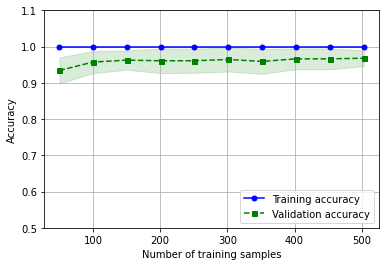

In [39]:
# Plot learning curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = clf,
                                                        X = X_train,
                                                        y = y_train,
                                                        train_sizes = np.linspace(0.1,1.0,10),
                                                        cv = 10,verbose=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', 
         marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')


plt.plot(train_sizes, test_mean, color='green', linestyle='--',
         marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.1])
plt.show()

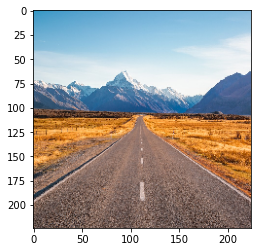

Plain


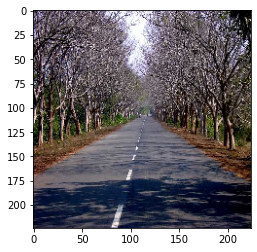

Plain


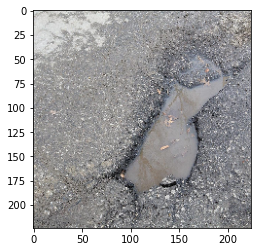

Pothole


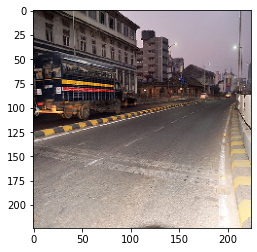

Plain


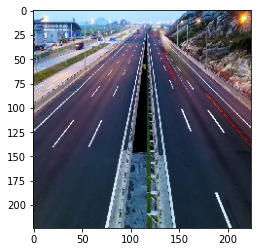

Plain


In [40]:
# Visualize predictions
visualize_predictions(clf, 5)

## Performance metrics

In [49]:
# Define function to visualize predictions
def test_output(classifier):
    result = []
    for f in test_features:
      try:
          prediction = classifier.predict(f)
      except:
          prediction = classifier.predict(f.reshape(1, 7*7*512))
      if(prediction < 0.5):
        result.append(0)
      else:
        result.append(1)
        
    return result
o = test_output(clf)


Confusion Matrix: 
[[67  3]
 [ 3 67]]
Accuracy:  0.9571428571428572
Specificity:  0.9571428571428572
Precision/Positive Predictive Value:  0.9571428571428572
Negative Predictive Value:  0.9571428571428572
Recall/Sensitivity:  0.9571428571428572
False Positive Rate:  0.5
False Negative Rate:  0.04285714285714286
Positive Likelihood Ratio:  1.9142857142857144
Negative Likelihod Ratio:  0.04477611940298507
Diagnostic Odds Ratio:  42.75238095238095
False Omission Rate:  0.04285714285714286
F1 Score:  0.9571428571428572
Area under ROC curve:  0.9571428571428572


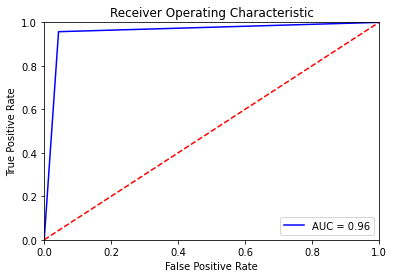

In [50]:
from sklearn.metrics import *
matrix = confusion_matrix(test_labels, o)
print("Confusion Matrix: ")
print(matrix)
[[tn, fp], [fn, tp]] = matrix

acc_score = accuracy_score(test_labels, o)
precision = precision_score(test_labels, o)
recall = tpr = recall_score(test_labels, o)
f1 = f1_score(test_labels, o)
roc_score = roc_auc_score(test_labels, o)
spc = tnr = tn/(tn + fp)
fpr = fp/(fp + fn)
fnr = fn/(fn+tp)
plr = tpr/fpr
nlr = fnr/tnr
dor = plr/nlr
npv = tn/(fn+tn)
fr = fn/(fn+tn)

print("Accuracy: ", acc_score)
print("Specificity: ", spc)
print("Precision/Positive Predictive Value: ", precision)
print("Negative Predictive Value: ", npv)
print("Recall/Sensitivity: ", recall)
print("False Positive Rate: ", fpr)
print("False Negative Rate: ", fnr)
print("Positive Likelihood Ratio: ", plr)
print("Negative Likelihod Ratio: ", nlr)
print("Diagnostic Odds Ratio: ", dor)
print("False Omission Rate: ", fr)
print("F1 Score: ", f1)
print("Area under ROC curve: ", roc_score)


fpr, tpr, threshold = roc_curve(test_labels, o)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()